In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ab_data = pd.read_csv('data/ab_data.csv')

In [3]:
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [4]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [5]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [6]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


Задание 4.1

Рассчитайте конверсию на каждый день по приведённой формуле. Результат занесите в столбец conversion. Чему была равна конверсия (в процентах) в группе А 5 января 2017 года? Ответ округлите до второго знака после запятой.

In [7]:
daily_data['conversion'] = daily_data['converted']/daily_data['users_count']*100

In [8]:
daily_data.head()

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361


In [9]:
mask = (daily_data['group'] == 'A') & (daily_data['timestamp'] == pd.to_datetime('2017-01-05'))
#daily_data[mask]
round(daily_data[mask]['conversion'], 2)

6    12.32
Name: conversion, dtype: float64

ВИЗУАЛЬНЫЙ АНАЛИЗ КОНВЕРСИИ В ГРУППАХ

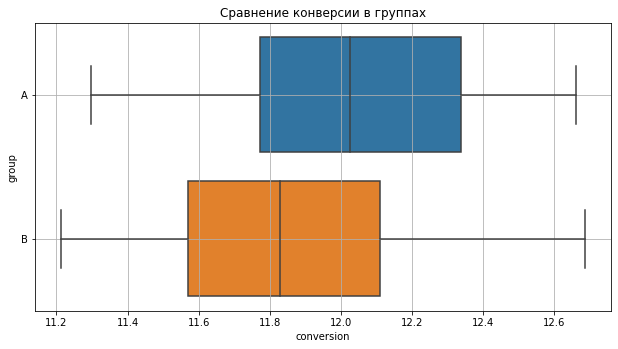

In [10]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();

In [11]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


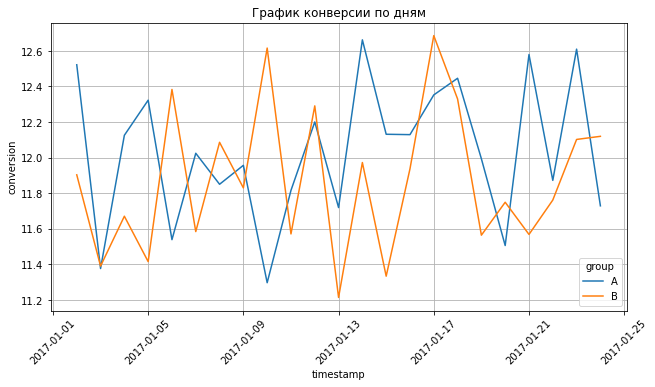

In [12]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

In [13]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())

/home/freeradical/anaconda3/envs/sf/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


In [14]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


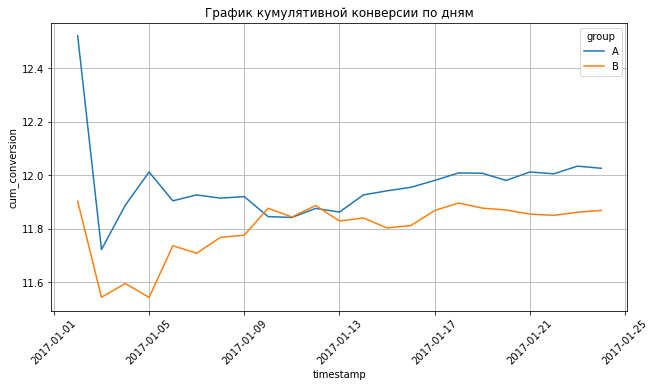

In [15]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [16]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

In [17]:
sample_b.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B
2,2020-11-06,1.003214e+08,0,0,B
3,2020-11-06,1.003652e+09,0,0,B
4,2020-11-06,1.003833e+09,0,0,B


Задание 4.6

Постройте таблицу со следующими ежедневными показателями:

количество посетителей сайта;
суммарное число транзакций;
общая сумма покупок (выручка).
Для этого сгруппируйте данные по признаку date, предварительно преобразовав его к типу datetime.

Чему равны значения ежедневных показателей в группе А на 8 ноября 2020 года?



In [18]:
sample_a['date'] = pd.to_datetime(sample_a['date'])
daily_a = sample_a.groupby(['date']).agg(
    {'cid':'count', 
     'transactions': 'sum', 
     'revenue': 'sum'}).reset_index().rename(columns={
         'cid': 'user_count',
         'transactions': 'trans_count',
         'revenue': 'rev_sum'})
daily_a.head()

,date,user_count,trans_count,rev_sum
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051
3,2020-11-09,3234,18,708830
4,2020-11-10,3022,29,826984


In [19]:
daily_a[daily_a['date'] == pd.to_datetime('2020-11-08')]

,date,user_count,trans_count,rev_sum
2,2020-11-08,3354,25,846051


In [20]:
sample_b['date'] = pd.to_datetime(sample_b['date'])
daily_b = sample_b.groupby(['date']).agg(
    {'cid':'count', 
     'transactions': 'sum', 
     'revenue': 'sum'}).reset_index().rename(columns={
         'cid': 'user_count',
         'transactions': 'trans_count',
         'revenue': 'rev_sum'})
daily_b.head()

,date,user_count,trans_count,rev_sum
0,2020-11-06,2499,19,996645
1,2020-11-07,2804,19,555499
2,2020-11-08,3291,24,3044842
3,2020-11-09,3062,25,1285836
4,2020-11-10,3072,30,2414726


Задание 4.7

Добавьте в каждую из таблиц кумулятивные метрики:

кумулятивное количество посетителей сайта;
кумулятивное суммарное число транзакций;
кумулятивная общая сумма покупок (кумулятивная выручка).
Рассчитайте кумулятивную конверсию действия покупки (в процентах) и кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций).

Чему равна средняя кумулятивная конверсия в группах за весь период проведения A/B-теста? Ответ округлите до сотых, знаки процентов не вводите.

In [21]:
daily_a['cum_users'] = daily_a['user_count'].cumsum()
daily_a['cum_trans'] = daily_a['trans_count'].cumsum()
daily_a['cum_revenue'] = daily_a['rev_sum'].cumsum()
daily_a['cum_conversion'] = daily_a['trans_count']/daily_a['user_count'] * 100
daily_a['cum_check_avg'] = daily_a['cum_revenue']/daily_a['trans_count']

In [22]:
daily_a.head()

,date,user_count,trans_count,rev_sum,cum_users,cum_trans,cum_revenue,cum_conversion,cum_check_avg
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.850592,143441.956522
2,2020-11-08,3354,25,846051,8634,64,4145216,0.745379,165808.640000
3,2020-11-09,3234,18,708830,11868,82,4854046,0.556586,269669.222222
4,2020-11-10,3022,29,826984,14890,111,5681030,0.959629,195897.586207


In [23]:
round(daily_a['cum_conversion'].mean(), 2)

0.72

In [24]:
daily_b['cum_users'] = daily_b['user_count'].cumsum()
daily_b['cum_trans'] = daily_b['trans_count'].cumsum()
daily_b['cum_revenue'] = daily_b['rev_sum'].cumsum()
daily_b['cum_conversion'] = daily_b['trans_count']/daily_b['user_count'] * 100
daily_b['cum_check_avg'] = daily_b['cum_revenue']/daily_b['trans_count']

In [25]:
round(daily_b['cum_conversion'].mean(), 2)

0.76

Задание 4.8

Постройте графики кумулятивной конверсии в каждой группе. Какие выводы по ним вы можете сделать?

In [26]:
daily_a['group'] = 'A'
daily_b['group'] = 'B'

In [27]:
daily_a_b = pd.concat([daily_a, daily_b])
daily_a_b.tail()

,date,user_count,trans_count,rev_sum,cum_users,cum_trans,cum_revenue,cum_conversion,cum_check_avg,group
13,2020-11-19,3171,29,2770174,48308,362,25483078,0.914538,8.787268e+05,B
14,2020-11-20,3075,15,1019850,51383,377,26502928,0.487805,1.766862e+06,B
15,2020-11-21,3129,22,2586267,54512,399,29089195,0.703100,1.322236e+06,B
16,2020-11-22,3378,34,1779841,57890,433,30869036,1.006513,9.079128e+05,B
17,2020-11-23,3493,30,1585306,61383,463,32454342,0.858861,1.081811e+06,B


In [41]:
daily_a_b = daily_a_b.sort_values(by='date', ascending=True).reset_index().drop(['index'], axis=1 )

In [42]:
daily_a_b.head()

,date,user_count,trans_count,rev_sum,cum_users,cum_trans,cum_revenue,cum_conversion,cum_check_avg,group
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500,A
1,2020-11-06,2499,19,996645,2499,19,996645,0.760304,52455.000000,B
2,2020-11-07,2704,23,1721886,5280,39,3299165,0.850592,143441.956522,A
3,2020-11-07,2804,19,555499,5303,38,1552144,0.677603,81691.789474,B
4,2020-11-08,3354,25,846051,8634,64,4145216,0.745379,165808.640000,A


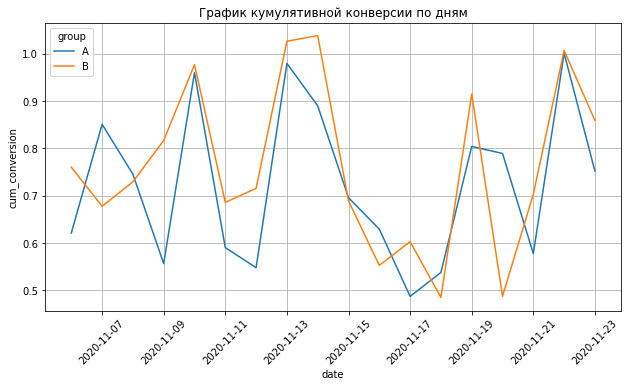

In [43]:
# создаём фигуру размером 8x4
fig1 = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax1 = fig1.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=daily_a_b, hue='group', ax=ax1)
# задаём подпись к графику
ax1.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax1.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax1.grid(True);

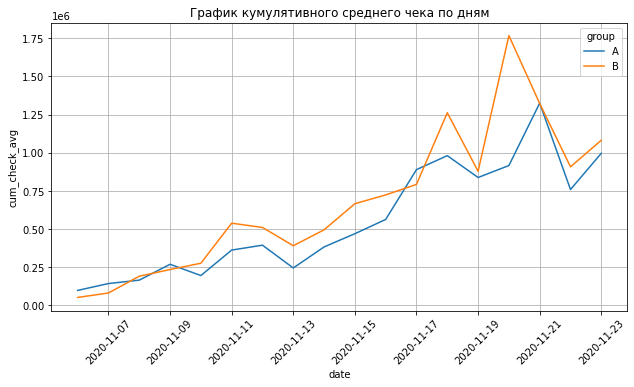

In [45]:
# создаём фигуру размером 8x4
fig1 = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax1 = fig1.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_check_avg', data=daily_a_b, hue='group', ax=ax1)
# задаём подпись к графику
ax1.set_title('График кумулятивного среднего чека по дням')
# задаём поворот меток на оси абсцисс
ax1.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax1.grid(True);